Problem statement

Your Client, a chain of hospitals aiming to create the next generation of healthcare for its patients, has retained McKinsey to help achieve its vision. The company brings the best doctors and enables them to provide proactive health care for its patients. One such investment is a Center of Data Science Excellence.

In this case, your client wants to have study around one of the critical disease "Stroke". Stroke is a disease that affects the arteries leading to and within the brain. A stroke occurs when a blood vessel that carries oxygen and nutrients to the brain is either blocked by a clot or bursts (or ruptures). When that happens, part of the brain cannot get the blood (and oxygen) it needs, so it and brain cells die.

Over the last few years, the Client has captured several health, demographic and lifestyle details about its patients. This includes details such as age and gender, along with several health parameters (e.g. hypertension, body mass index) and lifestyle related variables (e.g. smoking status, occupation type).

The Client wants you to predict the probability of stroke happening to their patients. This will help doctors take proactive health measures for these patients.

 

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

Load and read datasets

In [ ]:
#Load datasets
train = pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Stroke/main/train_ajEneEa.csv")
test = pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Stroke/main/test_v2akXPA.csv")
sample = pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Stroke/main/sample_submission_1.csv")

In [ ]:
train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [ ]:
test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
18596,67353,Male,20.0,0,0,No,Private,Rural,74.43,18.4,formerly smoked
18597,362,Male,61.0,0,0,Yes,Govt_job,Rural,211.55,31.6,smokes
18598,29839,Female,79.0,0,0,Yes,Private,Rural,125.74,29.4,never smoked
18599,6438,Male,55.0,0,0,Yes,Govt_job,Rural,69.46,33.8,never smoked


In [ ]:
sample

,id,stroke
0,36306,0
1,61829,0
2,14152,0
3,12997,0
4,40801,0
...,...,...
18596,67353,0
18597,362,0
18598,29839,0
18599,6438,0


Check for null values

In [ ]:
train.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [ ]:
test.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

Analyse data

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


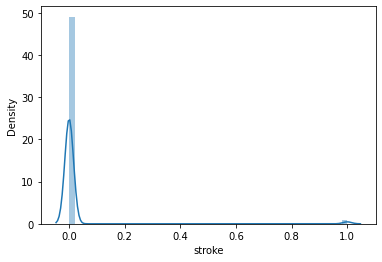

In [ ]:
sns.distplot(train['stroke'])

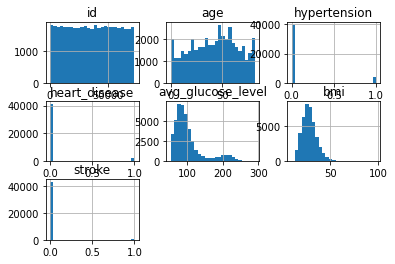

In [ ]:
#create histograms of classes
# create histograms of all variables
from pandas import read_csv
from matplotlib import pyplot

# create a histogram plot of each variable
train.hist(bins=25)
# show the plot
pyplot.show()

In [ ]:
import collections
from collections import Counter

counter = Counter(train.stroke)
for k,v in counter.items():
	per = v / len(train.stroke) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=0, Count=42617, Percentage=98.196%
Class=1, Count=783, Percentage=1.804%


In [ ]:
result = train.groupby('stroke')['stroke'].count()
result/len(train)*100

stroke
0    98.195853
1     1.804147
Name: stroke, dtype: float64

Assign X, y and X_test

In [ ]:
id = test.id

y = train.stroke
X = train.drop(['id', 'stroke'], axis=1)
X_test = test.drop(['id'], axis=1)

Create column transformer

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 3.3+ MB


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

numeric_features = [ 1, 2, 3, 7, 8]
numeric_transformer = Pipeline(steps=[('imputer', IterativeImputer(random_state=1)),
    ('scaler', StandardScaler())])

categorical_features = [0, 4, 5, 6, 9]
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
        ])

Split X for training and validation

In [ ]:
#split training set for training and testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1, test_size=0.10, stratify=y, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((39060, 10), (4340, 10), (39060,), (4340,), (18601, 10))

Create pipeline

In [ ]:
!pip install catboost

     |████████████████████████████████| 66.3MB 61kB/s 


In [17]:
from catboost import CatBoostClassifier

model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', CatBoostClassifier(class_weights= [.01804147, .9815853], iterations=2000, depth=15, random_state=1))]).fit(X_train, y_train)
print(model.score(X_train, y_train))

Learning rate set to 0.026095
0:	learn: 0.6620615	total: 1.71s	remaining: 57m 5s
1:	learn: 0.6471669	total: 1.74s	remaining: 28m 54s
2:	learn: 0.6164374	total: 2.9s	remaining: 32m 9s
3:	learn: 0.5899817	total: 4.08s	remaining: 33m 53s
4:	learn: 0.5661312	total: 5.26s	remaining: 34m 59s
5:	learn: 0.5447244	total: 6.43s	remaining: 35m 36s
6:	learn: 0.5219475	total: 7.59s	remaining: 36m 2s
7:	learn: 0.5009374	total: 8.78s	remaining: 36m 26s
8:	learn: 0.4812163	total: 9.95s	remaining: 36m 40s
9:	learn: 0.4642028	total: 11.1s	remaining: 36m 54s
10:	learn: 0.4504105	total: 12.3s	remaining: 37m 5s
11:	learn: 0.4356225	total: 13.5s	remaining: 37m 13s
12:	learn: 0.4207134	total: 14.7s	remaining: 37m 21s
13:	learn: 0.4067379	total: 15.8s	remaining: 37m 25s
14:	learn: 0.3936707	total: 17s	remaining: 37m 28s
15:	learn: 0.3816352	total: 18.2s	remaining: 37m 32s
16:	learn: 0.3700823	total: 19.3s	remaining: 37m 35s
17:	learn: 0.3591277	total: 20.5s	remaining: 37m 38s
18:	learn: 0.3491163	total: 21.7s

In [18]:
#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model.get_params()
print(params)

{'memory': None, 'steps': [('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  IterativeImputer(add_indicator=False,
                                                                   estimator=None,
                                                                   imputation_order='ascending',
                                                                   initial_strategy='mean',
                                                                   max_iter=10,
                                                                   max_value=None,
                                                                   min_value=None,
                                                                   missing_valu

Predict on validation set

In [19]:
y_pred = model.predict(X_val)

df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred.ravel()})
df

,Actual,Predicted
1343,0,0
7952,0,0
17711,0,0
10598,0,0
40313,0,0
...,...,...
7203,0,0
17311,0,0
25737,0,0
20690,0,0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


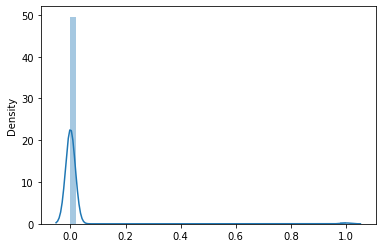

In [20]:
sns.distplot(y_pred)

In [21]:
import collections

print(collections.Counter(y_val))

Counter({0: 4262, 1: 78})


In [22]:
print(collections.Counter(y_pred.ravel()))

Counter({0: 4302, 1: 38})


In [23]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[4227,   35],
       [  75,    3]])

In [24]:
#Accuracy statistics
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred))  
#Create classification report
class_report=classification_report(y_val, y_pred)
print(class_report)

Accuracy Score: 0.9746543778801844
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4262
           1       0.08      0.04      0.05        78

    accuracy                           0.97      4340
   macro avg       0.53      0.52      0.52      4340
weighted avg       0.97      0.97      0.97      4340



Predict on test set

In [25]:
predictions = model.predict(X_test)
predictions.shape

(18601,)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


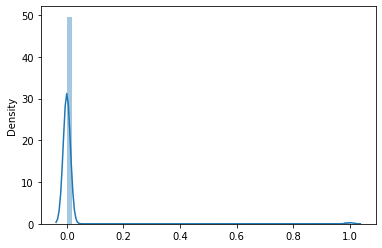

In [26]:
sns.distplot(predictions)

In [27]:
submission = pd.DataFrame({
        "id": id,
        "stroke": predictions.ravel()
    })
submission.to_csv('submission.csv', index=False)
submission

,id,stroke
0,36306,0
1,61829,0
2,14152,0
3,12997,0
4,40801,0
...,...,...
18596,67353,0
18597,362,0
18598,29839,0
18599,6438,0
